In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk, nltk.tokenize as tokenize
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import PassiveAggressiveClassifier 
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
#from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score , recall_score , precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import random
from sklearn.utils import shuffle
import re
#import oxforddictionaries
import os
os.getcwd()
import nltk
from nltk.corpus import stopwords
from string import punctuation

In [2]:
df=pd.read_csv("/home/arkaprabham/Desktop/BDA/ML_project_ideas/Fake_News_Detection/demonetization-tweets.csv",encoding='ISO-8859-1')
tweets=df["text"]
y=df.label
df=df.drop('label',axis=1)
tweets

0        RT @rssurjewala: Critical question: Was PayTM ...
1        RT @Hemant_80: Did you vote on #Demonetization...
2        RT @roshankar: Former FinSec, RBI Dy Governor,...
3        RT @ANI_news: Gurugram (Haryana): Post office ...
4        RT @satishacharya: Reddy Wedding! @mail_today ...
5        @DerekScissors1: Indiaï¿½s #demonetization: #B...
6        RT @gauravcsawant: Rs 40 lakh looted from a ba...
7        RT @Joydeep_911: Calling all Nationalists to j...
8        RT @sumitbhati2002: Many opposition leaders ar...
9        National reform now destroyed even the essence...
10       Many opposition leaders are with @narendramodi...
11       RT @Joydas: Question in Narendra Modi App wher...
12       @Jaggesh2 Bharat band on 28??<ed><U+00A0><U+00...
13       RT @Atheist_Krishna: The effect of #Demonetiza...
14       RT @sona2905: When I explained #Demonetization...
15       RT @Dipankar_cpiml: The Modi app on #DeMonetiz...
16       RT @roshankar: Former FinSec, RBI Dy Governor,.

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/arkaprabham/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
null=pd.isnull(tweets)

In [5]:
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer


cache_english_stopwords=stopwords.words('english')
punctuation += '΄´’…“”–—―»«'



In [6]:
import re
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

punctuation += '΄´’…“”–—―»«' 

cache_english_stopwords = stopwords.words('english')

def tweet_clean(tweet):
    tweet_no_special_entities = re.sub(r'\&\w*;', '', tweet)
    tweet_no_tickers = re.sub(r'\$\w*', '', tweet_no_special_entities)
    tweet_no_hyperlinks = re.sub(r'https?:\/\/.*\/\w*', '', tweet_no_tickers)
    tweet_no_hashtags = re.sub(r'#\w*', '', tweet_no_hyperlinks)
    tweet_no_punctuation = re.sub(r'[' + punctuation.replace('@', '') + ']+', ' ', tweet_no_hashtags)
    tweet_no_small_words = re.sub(r'\b\w{1,2}\b', '', tweet_no_punctuation)
    tweet_no_whitespace = re.sub(r'\s\s+', ' ', tweet_no_small_words) 
    tweet_no_whitespace = tweet_no_whitespace.lstrip(' ') 
    tweet_no_emojis = tweet_no_whitespace.encode('ascii', 'ignore').decode('ascii')
    tknzr = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True) 
    tw_list = tknzr.tokenize(tweet_no_emojis)
    list_no_stopwords = [i for i in tw_list if i not in cache_english_stopwords]
    tweet_filtered =' '.join(list_no_stopwords)
    return tweet_filtered

 




In [7]:
clean_tweets=[]
for i in range(len(tweets)):
    if null.iloc[i]==True:
        pass
    else:
        clean_tweets.append(tweet_clean(tweets.iloc[i]))

In [8]:
data_clean=clean_tweets
data_clean
dat=pd.DataFrame(data_clean)


In [9]:
data_clean

[u'critical question paytm informed edict clearly fishy requires full disclosure',
 u'vote modi survey app',
 u'former finsec rbi governor cbdt chair harvard professor lambaste aam aadmi listen',
 u'news gurugram haryana post office employees provide cash exchange patients hospitals',
 u'reddy wedding today cartoon',
 u'india symptom disease via',
 u'lakh looted bank kishtwar third incident since terrorists',
 u'911 calling nationalists join walk spread benefits among mas',
 u'many opposition leaders respect decision support oppositio',
 u'national reform destroyed even essence sagan instances urge giving second though',
 u'many opposition leaders respect decision support opposition coz party',
 u'question narendra modi app taking feedback people support strategy',
 u'bharat band 00a0 00bd 00b8 0082 protesting different party leaders',
 u'krishna effect',
 u'explained tried put words laced heavy technical',
 u'cpiml modi app proves govt totally indifferent mounting misery hards',
 u'fo

In [9]:
x_train,x_test,y_train,y_test=train_test_split(data_clean,y,test_size=0.4,random_state=53)


In [10]:
count_vectorizer=CountVectorizer(stop_words='english')
count_train=count_vectorizer.fit_transform(x_train)
count_test=count_vectorizer.transform(x_test)
print(count_vectorizer.vocabulary_)

{u'raining': 4427, u'shansha': 4967, u'yellow': 6156, u'protest': 4329, u'asian': 591, u'budhha': 984, u'marching': 3461, u'increase': 2848, u'baithe': 700, u'shuru': 5040, u'aur': 641, u'abro': 283, u'lord': 3366, u'sorry': 5164, u'wudve': 6138, u'sinking': 5067, u'updated': 5809, u'chennai': 1175, u'cruising': 1516, u'rescue': 4619, u'bhaven': 824, u'void': 5937, u'regional': 4542, u'railways': 4426, u'mla': 3617, u'foul': 2330, u'govern': 2476, u'affect': 390, u'bringing': 963, u'vast': 5869, u'5lakh': 232, u'upi': 5813, u'companies': 1308, u'solution': 5148, u'upa': 5806, u'convenience': 1409, u'shouting': 5024, u'enhance': 2012, u'washout': 5994, u'ups': 5820, u'9pm': 252, u'natarajan': 3734, u'charter': 1161, u'force': 2310, u'specially': 5181, u'tired': 5587, u'miller': 3567, u'bacon': 686, u'pulse': 4349, u'elections': 1970, u'second': 4883, u'washerman': 5992, u'implemented': 2814, u'neo': 3778, u'brexit': 955, u'naidu': 3718, u'preferences': 4240, u'thunder': 5569, u'panama':

In [11]:
Tfd = TfidfVectorizer(stop_words="english",max_df=0.7)
Tfd_train=Tfd.fit_transform(x_train)
Tfd_test=Tfd.transform(x_test)
# Get the feature names of `tfidf_vectorizer` 
print(Tfd.get_feature_names()[-10:])

# Get the feature names of `count_vectorizer` 
print(count_vectorizer.get_feature_names()[:10])
print(count_vectorizer)



[u'ysrcp', u'yup', u'zadaniambani', u'zeenewssports', u'zeeshan', u'zerch', u'zero', u'zindabad', u'zindagi', u'zone']
[u'000', u'00716', u'0080', u'0081', u'0082', u'0083', u'0084', u'0086', u'0087', u'0088']
CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


In [12]:
count_df=pd.DataFrame(count_train.A,columns=count_vectorizer.get_feature_names())
Tfd_df=pd.DataFrame(Tfd_train.A,columns=Tfd.get_feature_names())

In [13]:
difference=set(count_df.columns) - set(Tfd_df.columns)
print(difference)

set([])


In [14]:
print(count_df.equals(Tfd_df))

False


In [16]:
clf = MultinomialNB()

In [17]:
clf.fit(Tfd_train, y_train)
pred = clf.predict(Tfd_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, pred, labels=[0,1])
print(cm)

accuracy:   81.058
[[ 697  883]
 [ 249 4147]]


In [18]:
from sklearn.metrics import classification_report
target_names=["True","False"]
print(classification_report(y_test,pred, target_names=target_names))

             precision    recall  f1-score   support

       True       0.74      0.44      0.55      1580
      False       0.82      0.94      0.88      4396

avg / total       0.80      0.81      0.79      5976



Text(29,0.5,'true values')

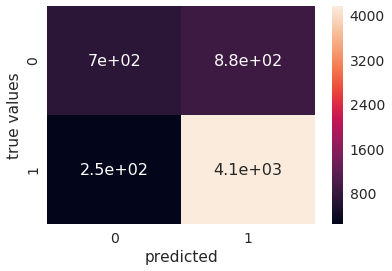

In [19]:
sns.set(font_scale=1.4)
sns.heatmap(cm,annot=True,annot_kws={'size':16})
#sns.set_axis_labels('true values','predicted')
plt.xlabel("predicted")
plt.ylabel("true values")

/home/arkaprabham/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


accuracy:   86.228


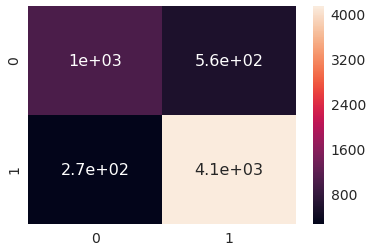

In [20]:
linear_clf = PassiveAggressiveClassifier(n_iter=50)
linear_clf.fit(Tfd_train, y_train)
pred = linear_clf.predict(Tfd_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
sns.set(font_scale=1.4)
sns.heatmap(cm,annot=True,annot_kws={'size':16})

In [21]:
pred

array([ True,  True, False, ...,  True, False, False])

In [22]:
from sklearn.metrics import classification_report
target_names=["True","False"]
print(classification_report(y_test,pred, target_names=target_names))

             precision    recall  f1-score   support

       True       0.79      0.65      0.71      1580
      False       0.88      0.94      0.91      4396

avg / total       0.86      0.86      0.86      5976



In [23]:
clf = MultinomialNB(alpha=0.1)
last_score = 0
for alpha in np.arange(0,1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(Tfd_train, y_train)
    pred = nb_classifier.predict(Tfd_test)
    score = metrics.accuracy_score(y_test, pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

Alpha: 0.00 Score: 0.84572
Alpha: 0.10 Score: 0.84070
Alpha: 0.20 Score: 0.83886
Alpha: 0.30 Score: 0.83450
Alpha: 0.40 Score: 0.83317
Alpha: 0.50 Score: 0.82915
Alpha: 0.60 Score: 0.82614
Alpha: 0.70 Score: 0.81844
Alpha: 0.80 Score: 0.81526
Alpha: 0.90 Score: 0.81392


/home/arkaprabham/anaconda2/lib/python2.7/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [24]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
    """
    See: https://stackoverflow.com/a/26980472
    
    Identify most important features if given a vectorizer and binary classifier. Set n to the number
    of weighted features you would like to show. (Note: current implementation merely prints and does not 
    return top classes.)
    """

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(Tfd, linear_clf, n=30)

(False, -8.84013755915945, u'pulse')
(False, -8.398781385676198, u'unrest')
(False, -7.753770812734904, u'action')
(False, -6.4108230901269, u'requires')
(False, -6.301689499486991, u'boycott')
(False, -5.988758683228159, u'implement')
(False, -5.899615471073074, u'rises')
(False, -5.806582261719587, u'period')
(False, -5.770087393614057, u'rally')
(False, -5.757580727914999, u'bjp')
(False, -5.685375563824088, u'suppliers')
(False, -5.6720550542083625, u'stolen')
(False, -5.629951250305994, u'choice')
(False, -5.608906415030502, u'rssurjewala')
(False, -5.541404613398633, u'sect')
(False, -5.50628785431729, u'retweeted')
(False, -5.47830357941312, u'washington')
(False, -5.351023736418732, u'centerofright')
(False, -5.177984336167059, u'auctions')
(False, -5.131308730855949, u'philosophy')
(False, -5.045314565020314, u'war')
(False, -5.042485666040352, u'minit')
(False, -5.0405579214647265, u'fy16')
(False, -5.02486865021177, u'hands')
(False, -5.0085722558653964, u'app')
(False, -4.9

In [25]:
feature_names = Tfd.get_feature_names()
### Most real
sorted(zip(clf.coef_[0], feature_names), reverse=True)[:20]

[(-4.087063347951685, u'demonetization'),
 (-4.116269268748139, u'modi'),
 (-4.21968759728442, u'india'),
 (-4.27523972592407, u'narendra'),
 (-4.331519469147407, u'rich'),
 (-4.338520394416871, u'dear'),
 (-4.3424684921631425, u'implement'),
 (-4.374331516292866, u'actually'),
 (-4.822357136342787, u'00a0'),
 (-4.910302016481311, u'00bd'),
 (-4.923395532972852, u'bank'),
 (-4.974562492277077, u'00b8'),
 (-5.0798293430751515, u'terrorists'),
 (-5.081382165308077, u'lakh'),
 (-5.107666097324441, u'people'),
 (-5.144652418117486, u'kishtwar'),
 (-5.14475656207667, u'incident'),
 (-5.146058558958072, u'looted'),
 (-5.189004941350682, u'nation'),
 (-5.317283166679383, u'support')]

In [26]:
### Most fake
sorted(zip(clf.coef_[0], feature_names))[:20]

[(-10.176596189464242, u'00716'),
 (-10.176596189464242, u'0081'),
 (-10.176596189464242, u'0083'),
 (-10.176596189464242, u'0086'),
 (-10.176596189464242, u'008b'),
 (-10.176596189464242, u'008e'),
 (-10.176596189464242, u'0090'),
 (-10.176596189464242, u'0094'),
 (-10.176596189464242, u'0097'),
 (-10.176596189464242, u'0098'),
 (-10.176596189464242, u'0099'),
 (-10.176596189464242, u'009a'),
 (-10.176596189464242, u'009b'),
 (-10.176596189464242, u'009d'),
 (-10.176596189464242, u'00a1'),
 (-10.176596189464242, u'00a4'),
 (-10.176596189464242, u'00a7'),
 (-10.176596189464242, u'00ab'),
 (-10.176596189464242, u'00af'),
 (-10.176596189464242, u'00b6')]

In [27]:
hash_vectorizer = HashingVectorizer(stop_words='english', non_negative=True)
hash_train = hash_vectorizer.fit_transform(x_train)
hash_test = hash_vectorizer.transform(x_test)
hash_test

/home/arkaprabham/anaconda2/lib/python2.7/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/home/arkaprabham/anaconda2/lib/python2.7/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
/home/arkaprabham/anaconda2/lib/python2.7/site-packages/sklearn/feature_extraction/hashing.py:94: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)


<5976x1048576 sparse matrix of type '<type 'numpy.float64'>'
	with 48374 stored elements in Compressed Sparse Row format>

/home/arkaprabham/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


accuracy:   86.479


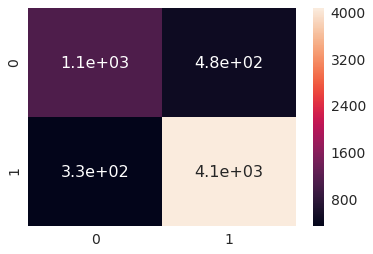

In [28]:
clf = PassiveAggressiveClassifier(n_iter=50)
clf.fit(hash_train, y_train)
pred = clf.predict(hash_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, pred, labels=[0,1])
sns.set(font_scale=1.4)
sns.heatmap(cm,annot=True,annot_kws={'size':16})

In [29]:
from sklearn.metrics import classification_report
target_names=["True","False"]
print(classification_report(y_test,pred, target_names=target_names))

             precision    recall  f1-score   support

       True       0.77      0.70      0.73      1580
      False       0.90      0.92      0.91      4396

avg / total       0.86      0.86      0.86      5976



In [30]:
a=pd.DataFrame({'col':y , 'text':data_clean})
a

,col,text
0,True,critical question paytm informed edict clearly...
1,True,vote modi survey app
2,True,former finsec rbi governor cbdt chair harvard ...
3,True,news gurugram haryana post office employees pr...
4,True,reddy wedding today cartoon
5,False,india symptom disease via
6,True,lakh looted bank kishtwar third incident since...
7,True,911 calling nationalists join walk spread bene...
8,True,many opposition leaders respect decision suppo...
9,False,national reform destroyed even essence sagan i...


In [31]:
target_names=["True","False"]
print(classification_report(y_test,pred, target_names=target_names))

             precision    recall  f1-score   support

       True       0.77      0.70      0.73      1580
      False       0.90      0.92      0.91      4396

avg / total       0.86      0.86      0.86      5976



In [32]:
lr_body = LogisticRegression(penalty='l1')

# train model
lr_body.fit(hash_train, y_train)

# get predictions for article section
y_body_pred = lr_body.predict(hash_test)

In [33]:


# print metrics
print ("Logistic Regression F1 and Accuracy Scores : \n")
print ( "F1 score {:.4}%".format( f1_score(y_test, y_body_pred, average='macro')*100 ) )
print ( "Accuracy score {:.4}%".format(accuracy_score(y_test, y_body_pred)*100) )


Logistic Regression F1 and Accuracy Scores : 

F1 score 79.62%
Accuracy score 84.64%


In [34]:
y

0         True
1         True
2         True
3         True
4         True
5        False
6         True
7         True
8         True
9        False
10       False
11        True
12       False
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
         ...  
14910     True
14911     True
14912     True
14913     True
14914     True
14915     True
14916    False
14917     True
14918     True
14919     True
14920     True
14921     True
14922     True
14923     True
14924     True
14925    False
14926     True
14927     True
14928     True
14929     True
14930     True
14931     True
14932    False
14933    False
14934     True
14935     True
14936    False
14937     True
14938     True
14939    False
Name: label, Length: 14940, dtype: bool

In [35]:

cros_val_list = cross_val_score(lr_body, Tfd_train,y_train,cv=7)
print (cros_val_list)
print (cros_val_list.mean())

[0.82839314 0.82683307 0.828125   0.828125   0.82890625 0.83828125
 0.8171875 ]
0.8279787441497659


In [36]:
class cross_validation(object):
    def __init__(self, model, X_data, Y_data, X_test=None, Y_test=None, 
                 n_splits=3, init_chunk_size = 1000000, chunk_spacings = 100000, average = "binary"):

        self.X, self.Y =  shuffle(X_data, Y_data, random_state=1234)
        
        
        self.model = model
        self.n_splits = n_splits
        self.chunk_size = init_chunk_size
        self.chunk_spacings = chunk_spacings        
        
        self.X_train = []
        self.X_test = []
        self.Y_train = []
        self.Y_test = []
        self.X_holdout = []
        self.Y_holdout = []
        
        self.f1_train = []
        self.f1_test = []
        self.acc_train = []
        self.acc_test = []
        self.pre_train = []
        self.pre_test = []
        self.rec_train = []
        self.rec_test = []
        
        self.f1_mean_train = []
        self.f1_mean_test = []
        self.acc_mean_train = []
        self.acc_mean_test = []
        self.pre_mean_train = []
        self.pre_mean_test = []
        self.rec_mean_train = []
        self.rec_mean_test = []
        
        self.training_size = []
        self.averageType = average
    
    def make_chunks(self):
        self.N_total = self.X.shape[0]
        # partition data into chunks for learning
        self.chunks = list(np.arange(self.chunk_size, self.N_total, self.chunk_spacings ))
        self.remainder = self.X.shape[0] - self.chunks[-1]
        self.chunks.append( self.chunks[-1] + self.remainder )



    def train_for_learning_curve(self):
        self.make_chunks()
        # for each iteration, allow the model to use 10 more samples in the training set 
        self.skf = StratifiedKFold(n_splits=self.n_splits, shuffle=True, random_state=1234)
        # iterate through the first n samples
        for n_points in self.chunks: 
            
        
            # split the first n samples in k folds 
            for train_index, test_index in self.skf.split(self.X[:n_points], self.Y[:n_points]):
                self.train_index, self.test_index = train_index, test_index                
                self.X_train = self.X[self.train_index]
                self.X_test = self.X[self.test_index]
                self.Y_train = self.Y[self.train_index]
                self.Y_test = self.Y[self.test_index]
                
                self.model.fit(self.X_train, self.Y_train)
                self.y_pred_train = self.model.predict(self.X_train)
                self.y_pred_test = self.model.predict(self.X_test)
                self.log_metric_scores_()   
                
            self.log_metric_score_means_()
            self.training_size.append(n_points)
        
    def validate_for_holdout_set(self, X_holdout, Y_holdout):
        
        
        self.X_test = X_holdout
        self.Y_test = Y_holdout
        
        # partiton data into chunks 
        self.make_chunks()
        
        for n_points in self.chunks:
            
            self.X_train = self.X[:n_points]
            self.Y_train = self.Y[:n_points]

            self.model.fit(self.X_train, self.Y_train)
            self.y_pred_train = self.model.predict(self.X_train)
            self.y_pred_test = self.model.predict(self.X_test)
            self.log_metric_scores_()   

            self.log_metric_score_means_()
            self.training_size.append(n_points)
            
            
    
                            
    def log_metric_score_means_(self):
        '''Recrods the mean of the four metrics recording during training'''
        self.f1_mean_train.append(np.sum(self.f1_train)/len(self.f1_train))
        self.f1_mean_test.append(np.sum(self.f1_test)/len(self.f1_test))
        
        self.acc_mean_train.append(np.sum(self.acc_train)/len(self.acc_train))
        self.acc_mean_test.append(np.sum(self.acc_test)/len(self.acc_test))
        
        self.pre_mean_train.append(np.sum(self.pre_train)/len(self.pre_train))
        self.pre_mean_test.append(np.sum(self.pre_test)/len(self.pre_test))
        
        self.rec_mean_train.append(np.sum(self.rec_train)/len(self.rec_train))
        self.rec_mean_test.append(np.sum(self.rec_test)/len(self.rec_test))
        
        self.reinitialize_metric_lists_()
            
            
    def reinitialize_metric_lists_(self):
        '''Reinitializes metrics lists for training'''
        self.f1_train = []
        self.f1_test = []
        self.acc_train = []
        self.acc_test = []
        self.pre_train = []
        self.pre_test = []
        self.rec_train = []
        self.rec_test = []

            
    def log_metric_scores_(self):
        '''Records the metric scores during each training iteration'''
        self.f1_train.append(f1_score(self.Y_train, self.y_pred_train, average=self.averageType))
        self.acc_train.append(accuracy_score( self.Y_train, self.y_pred_train) )

        self.pre_train.append(precision_score(self.Y_train, self.y_pred_train, average=self.averageType))
        self.rec_train.append(recall_score( self.Y_train, self.y_pred_train, average=self.averageType) )

        self.f1_test.append(f1_score(self.Y_test, self.y_pred_test, average=self.averageType))
        self.acc_test.append(accuracy_score(self.Y_test, self.y_pred_test))

        self.pre_test.append(precision_score(self.Y_test, self.y_pred_test, average=self.averageType))
        self.rec_test.append(recall_score(self.Y_test, self.y_pred_test,average=self.averageType))
            

    def plot_learning_curve(self):
        '''Plots f1 and accuracy learning curves for a given model and data set'''
        
        fig = plt.figure(figsize = (17,12))
        # plot f1 score learning curve
        fig.add_subplot(221)   # left
        plt.title("F1-Score vs. Number of Training Samples")
        plt.plot(self.training_size, self.f1_mean_train, label="Train")
        plt.plot(self.training_size, self.f1_mean_test, label="Test");
        plt.xlabel("Number of Training Samples")
        plt.ylabel("F1-Score")
        plt.legend(loc=4);
        
        # plot accuracy learning curve
        fig.add_subplot(222)   # right 
        plt.title("Accuracy vs. Number of Training Samples")
        plt.plot(self.training_size, self.acc_mean_train, label="Train")
        plt.plot(self.training_size, self.acc_mean_test, label="Test");
        plt.xlabel("Number of Training Samples")
        plt.ylabel("Accuracy")
        plt.legend(loc=4);
        
        # plot precision learning curve
        fig.add_subplot(223)   # left
        plt.title("Precision Score vs. Number of Training Samples")
        plt.plot(self.training_size, self.pre_mean_train, label="Train")
        plt.plot(self.training_size, self.pre_mean_test, label="Test");
        plt.xlabel("Number of Training Samples")
        plt.ylabel("Precision")
        plt.ylim(min(self.pre_mean_test), max(self.pre_mean_train) + 0.05)
        plt.legend(loc=4);
        
        # plot accuracy learning curve
        fig.add_subplot(224)   # right 
        plt.title("Recall vs. Number of Training Samples")
        plt.plot(self.training_size, self.rec_mean_train, label="Train")
        plt.plot(self.training_size, self.rec_mean_test, label="Test");
        plt.xlabel("Number of Training Samples")
        plt.ylabel("Recall")
        plt.legend(loc=4);

In [37]:

xtrain,xtest,ytrain,ytest = train_test_split(Tfd_train,y_train)
print (cros_val_list)
print (cros_val_list.mean())


[0.82839314 0.82683307 0.828125   0.828125   0.82890625 0.83828125
 0.8171875 ]
0.8279787441497659


In [38]:

#xtrain,xtest,ytrain,ytest = train_test_split(Tfd_train,y_train)

#cv = cross_validation(lr_body, xtrain, ytrain , n_splits=5,init_chunk_size = 100, chunk_spacings = 10, average = "binary")
#cv.validate_for_holdout_set(xtest, ytest)
#cv.plot_learning_curve()

In [38]:

rcf_headline = RandomForestClassifier(n_estimators=457,n_jobs=3)

rcf_headline.fit(Tfd_train, y_train)
y_rc_headline_pred = rcf_headline.predict(Tfd_test)

In [21]:

# print metrics
print ("Random Forest F1 and Accuracy Scores : \n")
print ( "F1 score {:.4}%".format( f1_score(y_test, y_rc_headline_pred, average='macro')*100 ) )
print ( "Accuracy score {:.4}%".format(accuracy_score(y_test, y_rc_headline_pred)*100) )

Random Forest F1 and Accuracy Scores : 

F1 score 86.55%
Accuracy score 89.66%


In [23]:
rcf_headline.oob_score

False

In [ ]:
cros_val_list = cross_val_score(rcf_headline, Tfd_train,y_train,cv=7)
print (cros_val_list)
print (cros_val_list.mean())

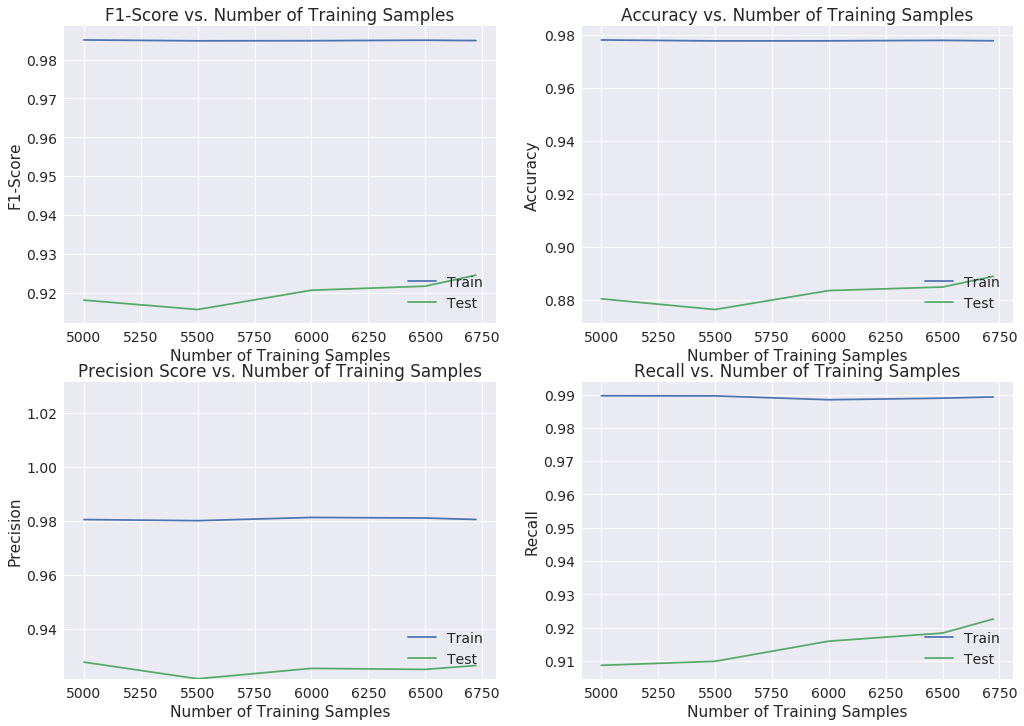

In [42]:
xtrain,xtest,ytrain,ytest = train_test_split(Tfd_train,y_train)

cv = cross_validation(rcf_headline, xtrain, ytrain , n_splits=5,init_chunk_size = 5000,chunk_spacings = 500, average = "binary")
cv.validate_for_holdout_set(xtest, ytest)
cv.plot_learning_curve()

In [ ]:
tdf = TfidfVectorizer(stop_words='english',ngram_range=(1,2))
vectorizer = tdf.fit(df["text"])
transformed_text = vectorizer.transform(df["text"])
transformed_title = vectorizer.transform(df)

In [42]:
print(transformed_text)

  (0, 38073)	0.20601651581276104
  (0, 37354)	0.054406586072695995
  (0, 37342)	0.20644644075391377
  (0, 37341)	0.2054500799513828
  (0, 36560)	0.20806180563953489
  (0, 36559)	0.2071729634961925
  (0, 35141)	0.20644644075391377
  (0, 35128)	0.18302791178868147
  (0, 33450)	0.2067355353660248
  (0, 33432)	0.1128736834207542
  (0, 32639)	0.20644644075391377
  (0, 32623)	0.19604417338469238
  (0, 23809)	0.20644644075391377
  (0, 23808)	0.20615933306204995
  (0, 16612)	0.20731979670440848
  (0, 16611)	0.20702664459098513
  (0, 14817)	0.2065907379776259
  (0, 14815)	0.20644644075391377
  (0, 13741)	0.20806180563953489
  (0, 13740)	0.20806180563953489
  (0, 11879)	0.20644644075391377
  (0, 11385)	0.04411423677168306
  (0, 10239)	0.20644644075391377
  (0, 10237)	0.2054500799513828
  (0, 8956)	0.20702664459098513
  :	:
  (14939, 42165)	0.1764423657582928
  (14939, 42163)	0.15961085256256516
  (14939, 42037)	0.1936936960581489
  (14939, 41992)	0.083269419049477
  (14939, 41619)	0.193693696058

In [47]:
a = transformed_text.todense()

In [48]:
def get_tfidf_term_scores(feature_names):
    '''Returns dictionary with term names and total tfidf scores for all terms in corpus'''
    term_corpus_dict = {}
    # iterate through term index and term 
    for term_ind, term in enumerate(feature_names):
        term_name = feature_names[term_ind]
        term_corpus_dict[term_name] = np.sum(transformed_title.T[term_ind].toarray())
        
    return term_corpus_dict

In [49]:
feature_names = tdf.get_feature_names()

In [50]:
term_corpus_dict = get_tfidf_term_scores(feature_names)

In [51]:
term_corpus_dict

{u'used think': 0.0,
 u'stop graft': 0.0,
 u'began indians': 0.0,
 u'need keynesian': 0.0,
 u'deewana release': 0.0,
 u'failed highlight': 0.0,
 u'madhurchadha': 0.0,
 u'rocva5ypwe': 0.0,
 u'woods': 0.0,
 u'army hope': 0.0,
 u'files petition': 0.0,
 u'gt modiji': 0.0,
 u'arvindkejriwal rally': 0.0,
 u'ek thha': 0.0,
 u'minister jaitley': 0.0,
 u'opener': 0.0,
 u'notice ht\xef': 0.0,
 u'2b8phiu69k': 0.0,
 u'not\xef https': 0.0,
 u'need introspect': 0.0,
 u'janjankibaat narendramodi\xef': 0.0,
 u'certain sectors': 0.0,
 u'combating black': 0.0,
 u'punjab': 0.0,
 u'deliberately\xef': 0.0,
 u'jo ander': 0.0,
 u'citizens bore': 0.0,
 u'tax terrorist': 0.0,
 u'42\xef \xbdc': 0.0,
 u'mushroomed wealthy': 0.0,
 u'uppta1': 0.0,
 u'bringing': 0.0,
 u'shefvaidya time': 0.0,
 u'uc4wokidts thanks': 0.0,
 u'ur rs': 0.0,
 u'wednesday': 0.0,
 u'realestateinvesting https': 0.0,
 u'tak': 0.0,
 u'https 0nldvkjgdp': 0.0,
 u'knb6xob9br': 0.0,
 u'payments growth': 0.0,
 u'https rkcmbttgzf': 0.0,
 u'state wb

In [52]:
def get_sorted_tfidf_scores(term_corpus_dict):
    '''Returns sort words from highest score to lowest score'''
    # sort indices from words wit highest score to lowest score
    sortedIndices = np.argsort( list(term_corpus_dict.values()))[::-1]
    # move words and score out of dicts and into arrays
    termNames = np.array(list(term_corpus_dict.keys()))
    scores = np.array(list(term_corpus_dict.values()))
    # sort words and scores
    termNames = termNames[sortedIndices]
    scores = scores[sortedIndices]
    
    return termNames, scores

In [53]:
termNames, scores = get_sorted_tfidf_scores(term_corpus_dict)

In [54]:
def getSelectScores(selectTerms):
    '''Returns a list of tfidf scores for select terms that are passed in'''
    score = [ term_corpus_dict[select_term]  for select_term in selectTerms]
    return score

In [69]:
selectTerms = ["modi","demonetization","india","country","note","money","aiadmk","economy","government","minister","prime","scams"]

In [73]:
term_corpus_dict

{u'used think': 0.0,
 u'stop graft': 0.0,
 u'began indians': 0.0,
 u'need keynesian': 0.0,
 u'deewana release': 0.0,
 u'failed highlight': 0.0,
 u'madhurchadha': 0.0,
 u'rocva5ypwe': 0.0,
 u'woods': 0.0,
 u'army hope': 0.0,
 u'files petition': 0.0,
 u'gt modiji': 0.0,
 u'arvindkejriwal rally': 0.0,
 u'ek thha': 0.0,
 u'minister jaitley': 0.0,
 u'opener': 0.0,
 u'notice ht\xef': 0.0,
 u'2b8phiu69k': 0.0,
 u'not\xef https': 0.0,
 u'need introspect': 0.0,
 u'janjankibaat narendramodi\xef': 0.0,
 u'certain sectors': 0.0,
 u'combating black': 0.0,
 u'punjab': 0.0,
 u'deliberately\xef': 0.0,
 u'jo ander': 0.0,
 u'citizens bore': 0.0,
 u'tax terrorist': 0.0,
 u'42\xef \xbdc': 0.0,
 u'mushroomed wealthy': 0.0,
 u'uppta1': 0.0,
 u'bringing': 0.0,
 u'shefvaidya time': 0.0,
 u'uc4wokidts thanks': 0.0,
 u'ur rs': 0.0,
 u'wednesday': 0.0,
 u'realestateinvesting https': 0.0,
 u'tak': 0.0,
 u'https 0nldvkjgdp': 0.0,
 u'knb6xob9br': 0.0,
 u'payments growth': 0.0,
 u'https rkcmbttgzf': 0.0,
 u'state wb

In [70]:
selectScores = getSelectScores(selectTerms)
selectScores

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [71]:
def plot_tfidf_scores(scores,termNames, selectScores, selectTerms,  n_words = 18):
    '''Returns one plot for Importance of Top N Terms
       and one plot for Importance of Select K Terms'''

    # Create a figure instance, and the two subplots
    fig = plt.figure(figsize = (14, 18))
    
    override = {'fontsize': 'large'}

    fig.add_subplot(221)   #top left
    n_words = 12
    sns.barplot(x = scores[:n_words], y = termNames[:n_words]);
    plt.title("TFIDF - Importance of Top {0} Terms".format(n_words));
    plt.xlabel("TFIDF Score");

    fig.add_subplot(222)   #top right 
    sns.barplot(x = selectScores, y = selectTerms);
    plt.title("TFIDF - Importance of Select {0} Terms".format(len(selectTerms)));
    plt.xlabel("TFIDF Score");
    plt.ylabel(override)

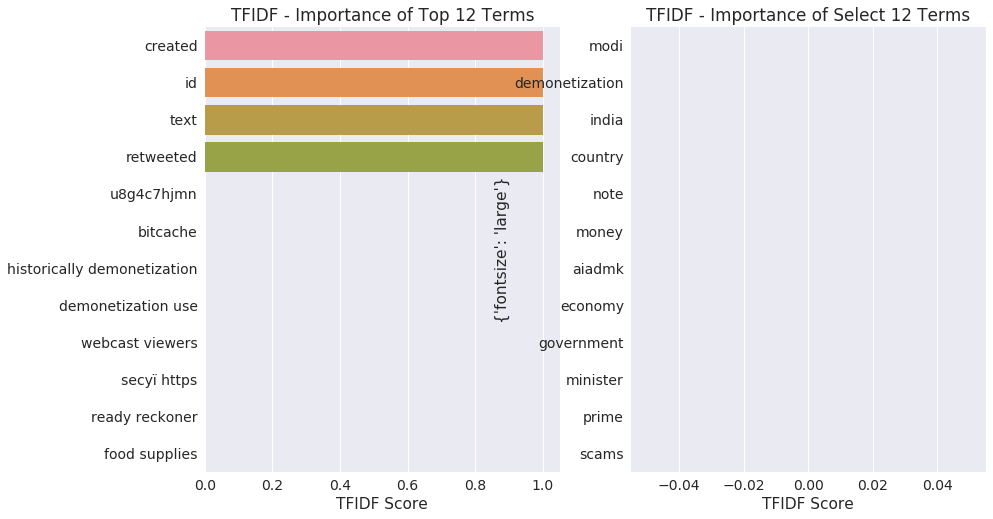

In [72]:
plot_tfidf_scores(scores, termNames, selectScores, selectTerms,  n_words = 18)

In [41]:
rcf_headline.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 457
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    rcf_headline.set_params(n_estimators=i)
    rcf_headline.fit(Tfd_train, y_train)
    print(i)
    oob_error = 1 - rcf_headline.oob_score_
    error_rate[i] = oob_error

/home/arkaprabham/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/forest.py:305: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706


In [42]:
oob_series = pd.Series(error_rate)

Text(0.5,1,'OOB Error Rate Across various Forest sizes \n(From 457 to 1000 trees)')

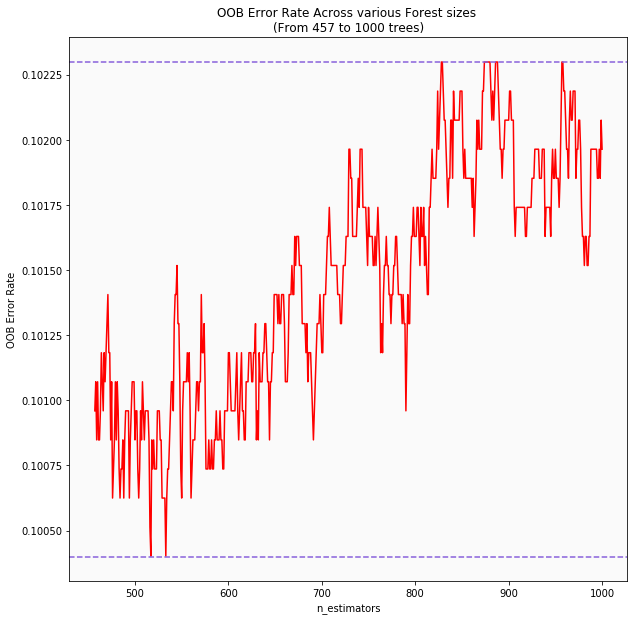

In [48]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',
                color = 'red')
plt.axhline(0.1004, 
            color='#875FDB',
           linestyle='--')
plt.axhline(0.1023, 
            color='#875FDB',
           linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 457 to 1000 trees)')